C:\Users\DAR\AppData\Local\Temp\ipykernel_22376\3683410130.py:49: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self.gaussian_pdf(x, self.means[c], self.stds[c])))  # Log likelihood


Accuracy: 0.70


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DAR\\ML_Projects\\naive_bayes_classifier\\naive_bayes_classifier\\confusion_matrix.png'

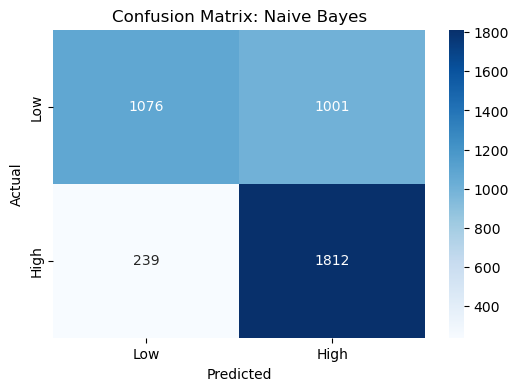

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing  # Dataset (20640 samples, 8 features)
from sklearn.model_selection import train_test_split  # Split data
from sklearn.metrics import accuracy_score, confusion_matrix  # Evaluate
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and prepare dataset (like PHP/MyAdmin tables)
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target
# Binary classification: 1 = high price (> median), 0 = low price
median_price = np.median(df['Price'])
df['PriceClass'] = (df['Price'] > median_price).astype(int)  # 1 = high, 0 = low

# Step 2: Split data (80% train, 20% test)
X = df.drop(['Price', 'PriceClass'], axis=1)  # Features
y = df['PriceClass']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Naive Bayes Classifier (from scratch)
class NaiveBayes:
    def __init__(self):
        self.class_priors = {}  # P(class)
        self.means = {}  # Mean per feature per class
        self.stds = {}  # Std dev per feature per class
    
    def fit(self, X, y):
        # Calculate priors and stats per class
        self.classes = np.unique(y)  # 0, 1
        for c in self.classes:
            X_c = X[y == c]  # Data for class c
            self.class_priors[c] = len(X_c) / len(X)  # P(class)
            self.means[c] = np.mean(X_c, axis=0)  # Mean per feature
            self.stds[c] = np.std(X_c, axis=0, ddof=1)  # Std dev per feature
    
    def gaussian_pdf(self, x, mean, std):
        # Normal distribution PDF: P(x|class) = (1/sqrt(2πσ²)) * e^(-(x-μ)²/(2σ²))
        exponent = -((x - mean) ** 2) / (2 * (std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(exponent)
    
    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.class_priors[c])  # Log prior
                likelihood = np.sum(np.log(self.gaussian_pdf(x, self.means[c], self.stds[c])))  # Log likelihood
                posterior = prior + likelihood  # Log posterior
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])  # Max posterior
        return np.array(predictions)

# Step 4: Train and evaluate
nb = NaiveBayes()
nb.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = nb.predict(X_test.to_numpy())
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 5: Confusion Matrix (recruiter appeal)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix: Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('naive_bayes_classifier/confusion_matrix.png')
plt.show()

# Step 6: Visualize Feature Likelihood (MedInc for high/low price)
plt.figure(figsize=(8, 6))
for c in nb.classes:
    sns.kdeplot(X_train[y_train == c]['MedInc'], label=f'Class {c} (Mean={nb.means[c][0]:.2f})')
plt.title('MedInc Likelihood by Price Class')
plt.xlabel('Median Income')
plt.ylabel('Density')
plt.legend()
plt.savefig('naive_bayes_classifier/medinc_likelihood.png')
plt.show()

C:\Users\DAR\AppData\Local\Temp\ipykernel_22376\2093053575.py:51: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self.gaussian_pdf(x, self.means[c], self.stds[c])))  # Log likelihood


Accuracy: 0.70


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DAR\\ML_Projects\\naive_bayes_classifier\\naive_bayes_classifier\\confusion_matrix.png'

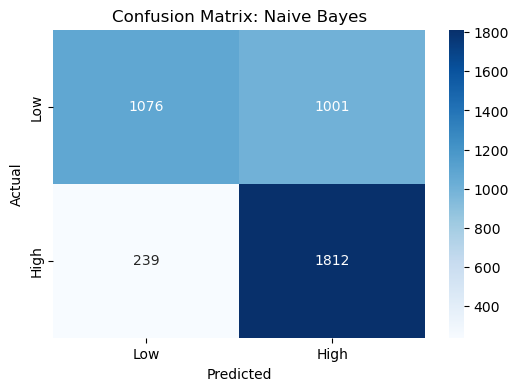

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing  # Dataset (20640 samples, 8 features)
from sklearn.model_selection import train_test_split  # Split data
from sklearn.metrics import accuracy_score, confusion_matrix  # Evaluate
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and prepare dataset (like PHP/MyAdmin tables)
data = fetch_california_housing()  # Load data
df = pd.DataFrame(data.data, columns=data.feature_names)  # DataFrame for features
df['Price'] = data.target  # Add price column
# Binary classification: 1 = high price (> median), 0 = low price
median_price = np.median(df['Price'])  # Median price
df['PriceClass'] = (df['Price'] > median_price).astype(int)  # 1 = high, 0 = low

# Step 2: Split data (80% train, 20% test)
X = df.drop(['Price', 'PriceClass'], axis=1)  # Features
y = df['PriceClass']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Naive Bayes Classifier (from scratch with epsilon fix)
class NaiveBayes:
    def __init__(self):
        self.class_priors = {}  # P(class)
        self.means = {}  # Mean per feature per class
        self.stds = {}  # Std dev per feature per class
        self.epsilon = 1e-9  # Small constant to avoid zero division
    
    def fit(self, X, y):
        # Calculate priors and stats per class
        self.classes = np.unique(y)  # 0, 1
        for c in self.classes:
            X_c = X[y == c]  # Data for class c
            self.class_priors[c] = len(X_c) / len(X)  # P(class)
            self.means[c] = np.mean(X_c, axis=0)  # Mean per feature
            self.stds[c] = np.std(X_c, axis=0, ddof=1)  # Std dev per feature
    
    def gaussian_pdf(self, x, mean, std):
        # Normal distribution PDF: P(x|class) = (1/sqrt(2πσ²)) * e^(-(x-μ)²/(2σ²))
        std = np.maximum(std, self.epsilon)  # Prevent zero division
        exponent = -((x - mean) ** 2) / (2 * (std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(exponent)
    
    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.class_priors[c])  # Log prior
                likelihood = np.sum(np.log(self.gaussian_pdf(x, self.means[c], self.stds[c])))  # Log likelihood
                posterior = prior + likelihood  # Log posterior
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])  # Max posterior
        return np.array(predictions)

# Step 4: Train and evaluate
nb = NaiveBayes()
nb.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = nb.predict(X_test.to_numpy())
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 5: Confusion Matrix (recruiter appeal)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix: Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('naive_bayes_classifier/confusion_matrix.png')  # Save for GitHub
plt.show()

# Step 6: Visualize Feature Likelihood (MedInc for high/low price)
plt.figure(figsize=(8, 6))
for c in nb.classes:
    sns.kdeplot(X_train[y_train == c]['MedInc'], label=f'Class {c} (Mean={nb.means[c][0]:.2f})')
plt.title('MedInc Likelihood by Price Class')
plt.xlabel('Median Income')
plt.ylabel('Density')
plt.legend()
plt.savefig('naive_bayes_classifier/medinc_likelihood.png')  # Save
plt.show()

In [4]:
#THE ERROR FOR stroring the image  and reference